## My understanding 
Currently I am thinking about economic markets and how they are a little bit pervasive. Everyone needs to live and at one point we might not have needed markets that much because we were self-sufficient, but at this point we aren't. There isn't necessarily anything normative about this, it isn't really good or bad to be more or less self-sufficient, but what it has caused is that most of our lives revolve around integrating in a market. 

This necessity of having our lives revolve around earning money to spend it in the market. Or earning money for it's own sake (is that really a thing?) causes the advent of capital 'slaves'. The idea is that because we are dependent on the market most of us can't get away from the things we need to do to integrate with the market (such as getting a job, working as long as that job dictates, etc). 

Marx (or my reading of the first bit of the communist manifesto... no I didn't finish it so take all of this with a grain of salt) seems to say that to get away from being slaves to those who own the capital making machines, we should have a higher government/central power that ensures there isn't a power dynamic between those who own the capital making machines and those who are employed by the machines. The issue is, power seems to be a pretty powerful attractor and thus far when a group of people is allowed to centralize all the means of production. Shit gets out of hand (not always.. but sometimes). Some people thus say - okay so we should move out of this paradigm and move towards socialism. We see the nordic countries doing this relatively well (and a couple of LatAm countries as well) but this still doesn't necessarily change one of the key things that people seem to be revolting against right now -> everyone is still required to work x amount to support the market. They have to do this to pay their debts to the country that is supporting them. 

Concept taht if we're self-sufficent we're slaves to creating our own means. Which was the point of scaling an economy + markets in the first place. We could go back to that -> but it inherently doesn't free up those who are more inclined towards creation to create. it means everyone needs to do the daily things. Is that really better? 

What I want to do with this model is thus
- Under perfect assumptions, are their 'winners' and losers in a capitalist market? Or in other words, Does simple randomness create inequality? 
- What are the minimum number/set of assumptions that need to be broken to model the reinforcing inequality we see today? 
- What regulations might we need to put on a capitalist market to ensure equity? 
- If people were more responsible for their own production - how would that change market conditions and equality. 
- What are the minimum differences between neo-libral and marxist economics? 
- What are the key differences that a regenerative framework introduces. What does that lead the outcomes to look like? How far does our paradigm need to change to reinforce equality? 

Which is a lot - and probably too much for my little abm toddle legs to get their chunky selves around but... les see how it goes!

Ongoing Journal: 

1/31/2022
I'm intrigued -> how might I make this a reinforcement learning game where we can see how the market may establish an equilibrium? Right now I'm holding the equilibrium constant (which is what would happen) BUT the fact that no one can go up or down at all might mean that the natural equilibrium setting constant might not be able to happen (ie someone might benefit from undercutting? (doesn't seem right at all. bc that's the point but still...) In this way we might be able to figure out what it takes to establish an equilibrium and if we're more or less likely to observe inequality at this point. 

Also - I've been trying to figure out how I might see computationally how a 'regenerative economy' would actually establish this equilibrium. Do we need to radically change the capitalist framework? 

2/9/2022
Invest at the end of the week? Find a way to incorporate learning as time goes on -> how do you get smarter? 
How do you have differences incorporated such as thedifferent amount of goods that someone needs/wants? 
Equality vs fairness -> fair should be that you fit the needs that need to be met. 
Things I found - didn't set how many goods each person needs. 
Reinvestment seems a bit difficult atm it leaves either goods or capital empty. 
Does this work? 
If has not enough incoporation 

2/16/2021
Next steps - 
- Only try one transaction instead of 10 this can help show if your transaction numbers are wrong. 
- Write down all assumptions of how the system works.
- After you buy you give all capital to the seller. 
- Who is taking the capital away/where is the capital going? 
- Conservation means nothing goes in and nothing goes out. 
    - Clearing means going out to nowhere. 
    
If the two numbers add together at the same time -> shows conserved. Print out seller + buyer == 10 at all times. 
Pricing + value of the good. 
Perfect competition -> demand for any single seller is elastic (as in a slight change would totally change how much demand they have). What is the relationship between price driven demand v intrinsic demand. 
- Difference between price and value (how i might value something might not be related to the price.)
    - Not perfect competition
INSTEAD 
- could have a variable that changes individual value. 
- X type of goods -> I have a certain value for x from y. (In the breaking perfect competition model) 



In [156]:
import random as rand
from matplotlib import pyplot as plt
import numpy as np
import math
import statistics as stat
import seaborn as sns

In [96]:
class Agent:
    def __init__(self, id, inheretance = 0, capital = 10, goods = 100):
        """Initialize attributes
            
            id = id number -> may not need. Why would we need? 
            Inheretance = the starting capital of each individual
            capital = the current capital of each individual
            growth = rate of growth of that person's capital
        """
        self.id = id
        self.inheretance = inheretance
        self.capital = capital
        self.goods = goods
        
    def set_capital(self, n): 
        """updates your capital based on your past capital
        
        """
        self.capital += n
        
    def set_goods(self, n):
        #Sets goods = whatever they were before + n
        self.goods += n
        
    def get_capital(): 
        return capital
        
    def get_goods(self): 
        return goods

In [165]:
class Market: 
    cost_living = 1
    cost_good = 1
    invest_rate = 0.05
    
    def __init__(self, n  = 1000, repeat = 1000, rand = 0):
        """Initializes attributes: 
            
            n = number of agents
            repeat = free market iterations
            rand = randomness factor? Might not need
        """
        self.n = n
        self.repeat = repeat
        
        #create agents
        self.agents = [Agent(id=i) for i in range(n)]
        
        #repeat the market transactions repeat number of times times
        for i in range(repeat):
            self.step()
        
    def step(self): 
        for agent in self.agents: 
            self.buy(agent)
            
    def buy(self, buyer): 
        
    #The next chunk acts to satisfy the 'no preference' aspect of perfect competition
        #choose who to buy from randomly
        choice = rand.randint(0,len(self.agents)-1)
        seller = self.agents[choice] #choose a random person
        if seller.id == buyer.id: #check if the random person is yourself
            seller = self.agents[choice - 1] #choose +1 to the original id of the agent? 
        
        #check if the seller has enough goods 
        ind_demand = math.floor(buyer.capital/self.cost_good)
        if seller.goods >= ind_demand:        
            #if seller has enough - buy all goods from this seller
            #self.sell(total) - sell
            capital = buyer.capital
            seller.set_capital(capital)
            seller.set_goods(-ind_demand)
            
            
            #buy
            buyer.set_goods(ind_demand)
            buyer.set_capital(-capital)
            
            #if seller doesn't have enough. Buy all the seller's goods, adjust capital and 'buy' again. 
        else: 
            #seller doesn't have enough - buy all goods from this seller then buy again. 
            sold = seller.goods
            seller.set_capital(sold*self.cost_good)
            seller.set_goods(-sold)
            
            #buy
            buyer.set_goods(sold)
            buyer.set_capital(-sold*self.cost_good)
            
            #self.buy(buyer)
        #consume what you need to live
        
        if buyer.goods >= self.cost_living:
            buyer.set_goods(-self.cost_living)
        else: 
            buyer.set_goods(-buyer.goods)
        
        #invest the remainder. 
        #buyer.set_goods(self.invest(buyer.goods))
        
   # def sell(self):
        #Reduces the num
        
    def invest(self, goods): 
        #multiplys goods by the investment rate. Gives us the growth factor. 
        return goods*self.invest_rate
    
   # def consume(self):
        #didn't end up using. 
        
   # def visualize(self): 
    def summarize(self, agents):
        capital = np.array([agent.capital for agent in agents])
        fig, ax = plt.subplots(figsize =(10, 7))
        ax.hist(capital, bins = [0, 25, 50, 75, 100])
        plt.show
        
        
        
    

Text(0, 0.5, 'Frequency')

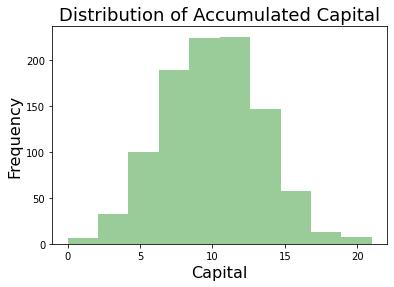

In [166]:
market = Market()

# Generate two normal distributions
n_bins = 5

capital = np.array([agent.capital for agent in market.agents])
#print(capital, stat.mean(capital), sum(capital))

#fig, ax = plt.subplots(figsize =(10, 7))
#ax.hist(capital)
#plt.show

sns.distplot(capital, kde=False, color='green', bins=10)
plt.title('Distribution of Accumulated Capital', fontsize=18)
plt.xlabel('Capital', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# We can set the number of bins with the *bins* keyword argument.

